In [1]:
import numpy as np
import pandas as pd
import collections
from sklearn import datasets,tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

Load dataset from sklearn datasets

In [2]:
iris = datasets.load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris.data.shape

(150, 4)

In [6]:
iris.target.shape

(150,)

In [7]:
collections.Counter(iris.target)

Counter({0: 50, 1: 50, 2: 50})

In [8]:
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,
                                                 test_size=0.2,random_state=123,
                                                 stratify=iris.target
                                                )

In [9]:
collections.Counter(y_train)

Counter({1: 40, 0: 40, 2: 40})

In [10]:
#design the model
model = DecisionTreeClassifier()

#train the model using the training dataset
model.fit(X_train,y_train)

#predict the target using the test dataset
y_pred = model.predict(X_test)

#evaluate model accuracy
acc = metrics.accuracy_score(y_test,y_pred)
print('{:.4f}'.format(acc))

0.8333


In [11]:
# f1 score
# F1 = 2 * (precision * recall) / (precision + recall)
# precision = the number of true positives over the number of true positives plus the number of false positives 
# recall = the number of true positives over the number of true positives plus the number of false negatives
f1_score = metrics.f1_score(y_test,y_pred,average=None)
print(f1_score)

[1.         0.73684211 0.76190476]


In [12]:
#confusion matrix
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[10  0  0]
 [ 0  7  3]
 [ 0  2  8]]


In [13]:
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,cmap="Greens",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [14]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_2 <= 4.75
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: 1
|   |   |--- feature_3 >  1.65
|   |   |   |--- class: 2
|   |--- feature_2 >  4.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_1 <= 2.95
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  2.95
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.70
|   |   |   |   |--- feature_0 <= 6.05
|   |   |   |   |   |--- feature_3 <= 1.55
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_3 >  1.55
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.05
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.70
|   |   |   |   |--- class: 2



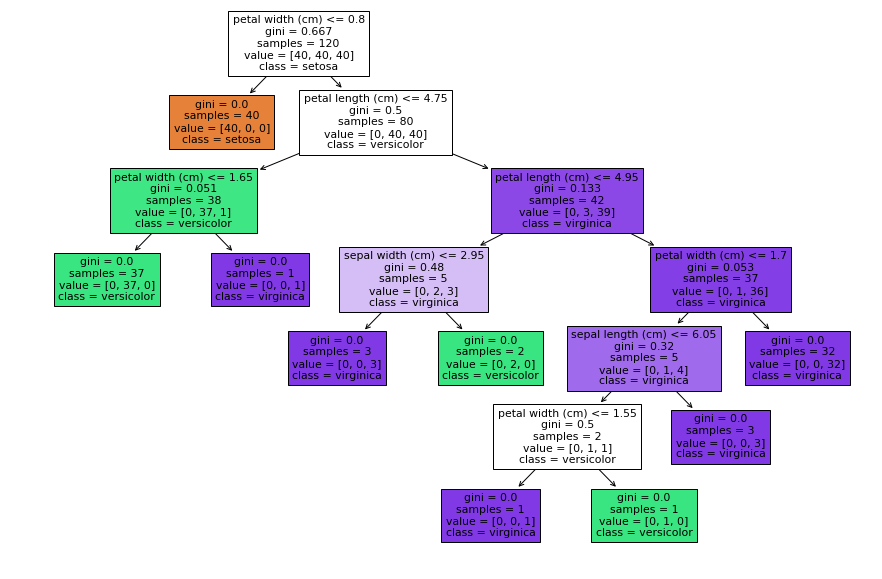

In [15]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(model, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True);

### compare with naive bayes classifier

In [16]:
from sklearn.naive_bayes import GaussianNB
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,
                                                 test_size=0.2,random_state=123,
                                                 stratify=iris.target
                                                )

#create a gaussian classifier
gnb = GaussianNB()

#train the model using the training dataset
gnb.fit(X_train,y_train)

#predict the target using the test dataset
y_pred = gnb.predict(X_test)

#evaluate model accuracy
acc = metrics.accuracy_score(y_test,y_pred)
print('{:.4f}'.format(acc))

0.9667


In [17]:
# f1 score
# F1 = 2 * (precision * recall) / (precision + recall)
# precision = the number of true positives over the number of true positives plus the number of false positives 
# recall = the number of true positives over the number of true positives plus the number of false negatives
f1_score = metrics.f1_score(y_test,y_pred,average=None)
print(f1_score)

[1.         0.94736842 0.95238095]


In [18]:
#confusion matrix
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


In [19]:
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,cmap="Greens",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');